<a href="https://colab.research.google.com/github/dishankkalra23/Medical-Appointment-No-Shows/blob/main/Medical_Appointment_No_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Medical Appointment No Shows

>[Project: Medical Appointment No Shows](#scrollTo=BmfbjWRNOPeO)

>>>[Importing Libraries](#scrollTo=zy3dSfeNPPCc)

>>>[Downloading dataset](#scrollTo=by5KNcWYVbXS)

>>>[Loading dataset](#scrollTo=N14ODJZWXEZd)

>[Data Wrangling](#scrollTo=zzG5_tl6_OJF)

>>[Making new column Scheduled time](#scrollTo=kislWLDHJly8)

>>[Rename columns](#scrollTo=HaJI_xlfgW12)

>>[Changing no_show(to show) column to avoid misconception and easily understandable](#scrollTo=FHgwFcz7kNr4)

>>[TO BE CHECKED: handicap and sms_received](#scrollTo=Cq1jFItJpjz8)

>>[Duplicates in data](#scrollTo=KLgc2zuUrD_9)

>>[Exploratory Data Analysis](#scrollTo=z2dmfUqaOPee)

>>>[Research Question 1 (Replace this header name!)](#scrollTo=z2dmfUqaOPee)

>>>[Research Question 2  (Replace this header name!)](#scrollTo=2HAUXwNDOPef)

>>[Conclusions](#scrollTo=LfvthrGmOPeg)



### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Downloading dataset

In [3]:
! pip install -q kaggle

In [ ]:
# Upload your kaggle.json file containing API token
from google.colab import files
files.upload()

In [5]:
# Move the downloaded file to a location ~/.kaggle/kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# You need to give proper permissions to the file (since this is a hidden folder)
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Copy API command to download dataset
! kaggle datasets download -d joniarroba/noshowappointments
! unzip \*.zip
! rm *.zip

  0% 0.00/2.40M [00:00<?, ?B/s]
100% 2.40M/2.40M [00:00<00:00, 80.6MB/s]
Archive:  noshowappointments.zip
  inflating: KaggleV2-May-2016.csv   


### Loading dataset

In [7]:
df = pd.read_csv('/content/KaggleV2-May-2016.csv')

In [8]:
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
94929,6.352154e+11,5768415,F,2016-06-03T07:34:25Z,2016-06-06T00:00:00Z,56,ILHA DO PRÍNCIPE,0,1,1,0,0,1,No
25203,9.844782e+11,5580936,F,2016-04-14T07:28:39Z,2016-05-09T00:00:00Z,41,JESUS DE NAZARETH,0,0,0,1,0,0,Yes
107286,2.545695e+12,5558644,F,2016-04-07T17:48:27Z,2016-06-07T00:00:00Z,51,JUCUTUQUARA,0,0,0,0,0,1,No
43229,1.691565e+13,5682207,F,2016-05-10T16:01:41Z,2016-05-30T00:00:00Z,13,CENTRO,1,0,0,0,0,1,Yes
77295,3.716914e+12,5679447,F,2016-05-10T09:56:49Z,2016-05-10T00:00:00Z,32,BELA VISTA,1,0,0,0,0,0,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> 

> No missing values in data

> **Data type of columns to be fixed,**
1. PatientId is the unique id for identification of a patient and float datatype doesn't make sense.
2. ScheduledDay and AppointmentDay can be used in analysis if we convert them into date-time format.


# Data Wrangling

In [10]:
df.PatientId = df.PatientId.astype('int')
df.PatientId.dtypes

dtype('int64')

In [11]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df[['ScheduledDay','AppointmentDay']].dtypes

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

## Making new column Scheduled time 
> Converting ScheduleDate & AppointmentDate column to store dates and ScheduledTime & AppointmentTime to  store time of appointment

In [12]:
df['ScheduledTime'] = pd.to_datetime(df.ScheduledDay).dt.time
df['AppointmentTime'] = pd.to_datetime(df.AppointmentDay).dt.time

In [13]:
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [14]:
df.AppointmentTime.sample(5)

8723     00:00:00
85350    00:00:00
49938    00:00:00
26113    00:00:00
81464    00:00:00
Name: AppointmentTime, dtype: object

In [15]:
df.AppointmentTime.nunique()

1

> Appointment Time is 00:00:00 in all the rows, it is not relevant to analysis. Hence dropping AppointmentTime column 

In [16]:
df.drop(columns='AppointmentTime',inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledTime'],
      dtype='object')

In [17]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> Age can never be negative, removing rows which have age less than 0

In [18]:
df_less_0 = df.query('Age < 0')
df_less_0.Age.count()

1

> Only single row with age less than 0

In [19]:
df = df.query('Age >= 0')

## Rename columns

In [20]:
labels = {'PatientId':"patient_id", 'AppointmentID':'appointment_id', 'Gender':'gender', 
        'ScheduledDay':'scheduled_day',
       'AppointmentDay':'appointment_day', 'Age':'age', 'Neighbourhood':'neighbourhood', 
       'Scholarship':'scholarship', 'Hipertension':'hypertension',
       'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handicap', 
       'SMS_received':'sms_received', 'No-show':'show',
       'ScheduledTime':'scheduled_time'}
df.rename(columns=labels,inplace=True)

In [21]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show', 'scheduled_time'],
      dtype='object')

## Changing no_show(to show) column to avoid misconception and easily understandable

Substituting Yes with 0 and No with 1

In [22]:
df.show = df.show.map({'Yes':0,'No':1})
df.show.astype(int)

0         1
1         1
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: show, Length: 110526, dtype: int64

In [23]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show', 'scheduled_time'],
      dtype='object')

## TO BE CHECKED: handicap and sms_received

 

In [24]:
handicap_patients = df.query("handicap > 0").handicap.count()
total_patients = df.handicap.count()
handicap_patients/total_patients

0.020275772216492047

In [25]:
got_sms = df.query("sms_received == 1").sms_received.count()
total_patients = df.sms_received.count()
got_sms/total_patients

0.3210285362720084

## Appointment day is before Scheduled Day

In [64]:
df.patient_id.count()

110526

In [68]:
df_error = df[df.scheduled_day > df.appointment_day ][['patient_id','appointment_id','scheduled_day','appointment_day','show']]
df_error

,patient_id,appointment_id,scheduled_day,appointment_day,show
27033,7839272661752,5679978,2016-05-10,2016-05-09,0
55226,7896293967868,5715660,2016-05-18,2016-05-17,0
64175,24252258389979,5664962,2016-05-05,2016-05-04,0
71533,998231581612122,5686628,2016-05-11,2016-05-05,0
72362,3787481966821,5655637,2016-05-04,2016-05-03,0


> In the first row, appointment day is **9th May** and scheduled day is **10th May** which doesn't make any sense. So we will be dropping these rows where appointment day is before scheduled day

In [71]:
print('Number of rows with appointment day before scheduled day:',df_error.patient_id.count())

Number of rows with appointment day before scheduled day: 5


In [72]:
df = df[df.scheduled_day <= df.appointment_day ]
df.patient_id.count()

110521

## Duplicates in data

In [73]:
df.duplicated().sum()

0

> No duplicates in data

<a id='eda'></a>
# Exploratory Data Analysis

In [105]:
df.describe().iloc[2:,2:]

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
std,23.109885,0.297682,0.397929,0.258272,0.17169,0.161494,0.466879,0.401419
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.00000,4.000000,1.000000,1.000000


In [104]:
df.corr().iloc[2:,2:]

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
age,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,0.060320
scholarship,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.029166
hypertension,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,0.035662
diabetes,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,0.015158
alcoholism,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,0.000181
handicap,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,0.006290
sms_received,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,-0.126502
show,0.060320,-0.029166,0.035662,0.015158,0.000181,0.006290,-0.126502,1.000000


## Age

In [32]:
gender_show = df.groupby('gender').show.sum()
gender_show

gender
F    57245
M    30962
Name: show, dtype: int64

In [33]:
gender_total = df.groupby('gender').patient_id.count()
gender_total

gender
F    71839
M    38687
Name: patient_id, dtype: int64

In [34]:
prop_female_patients = gender_total.F/(gender_total.F + gender_total.M)*100
prop_female_patients

64.99737618297956

In [35]:
prop_male_patients = gender_total.M/(gender_total.F + gender_total.M)*100
prop_male_patients

35.00262381702043

### Proportion of female and male patients

In [36]:
def horizontal_bars(name,prop,title):
  fig, ax = plt.subplots(figsize =(10, 5))
  ax.barh(name, prop)

  # To add grid
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)

  # To remove axes
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)

  # To remove x and y ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')

  plt.xticks(fontsize=10)
  plt.yticks(fontsize=12)

  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 15)

  plt.xlabel('\n\nPercentage of Patients',fontsize=12)
  plt.ylabel('Gender',fontsize=12)
  ax.set_title(title,fontsize = 15 )

  for i in ax.patches:
      plt.text(i.get_width()+0.01, i.get_y()+0.4,
              str(round((i.get_width()), 2)),
              fontsize = 12, fontweight ='bold',
              color ='grey')
      
  plt.show()

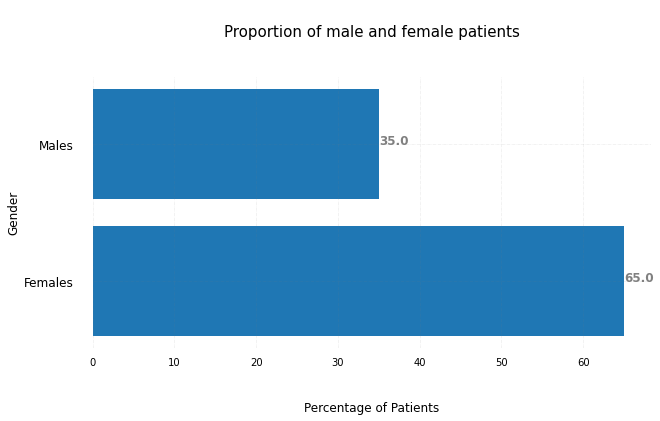

In [37]:
gend = ['Females','Males']
prop = [prop_female_patients,prop_male_patients]
title = '\nProportion of male and female patients\n\n'
horizontal_bars(gend,prop,title)

In [38]:
prop_female_show = (gender_show.F/gender_total.F)*100
prop_female_show

79.68512924734476

In [39]:
prop_male_show = (gender_show.M/gender_total.M)*100
prop_male_show

80.03205211052808

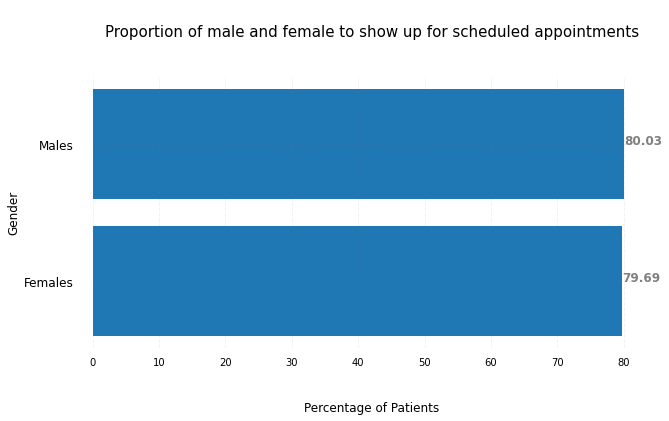

In [40]:
gend = ['Females','Males']
prop = [prop_female_show,prop_male_show]
title = '\nProportion of male and female to show up for scheduled appointments\n\n'

horizontal_bars(gend,prop,title)

In [41]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show', 'scheduled_time'],
      dtype='object')

In [42]:
gender_show_1 = df.groupby('scholarship').show.sum()
gender_show_1

scholarship
0    79924
1     8283
Name: show, dtype: int64

In [43]:
gender_total_1 = df.groupby(['scholarship']).patient_id.count()
gender_total_1

scholarship
0    99665
1    10861
Name: patient_id, dtype: int64

In [44]:
(gender_show_1[0]/gender_total_1[0])*100

80.19264536196258

In [45]:
(gender_show_1[1]/gender_total_1[1])*100

76.26369579228432

In [46]:
gender_total_1[1]/(gender_total_1[1] + gender_total_1[0])*100

9.826647123753688



### Research Question 1 (Replace this header name!)

In [47]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [48]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!